### ESMA 4016
### Random Forest con las libreria H20  y scikit-learn
#### Edgar Acuna

In [38]:
import h2o
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import graphviz
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
h2o.no_progress()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,54 mins 56 secs
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.6
H2O cluster version age:,23 days
H2O cluster name:,H2O_from_python_edgar2017_qqiwm0
H2O cluster total nodes:,1
H2O cluster free memory:,1.000 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


### I- Aplicando Random Forest a Diabetes usando H20. 

In [39]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ORandomForestEstimator(ntrees=50,nfolds=10,max_depth=10)
model.train(myx, myy, training_frame = diabetes)
y_pred=model.predict(diabetes)
print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))

0.936197916667


In [40]:
model.model_performance(diabetes)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0436344048674
RMSE: 0.208888498648
LogLoss: 0.190249982594
Mean Per-Class Error: 0.00873134328358
AUC: 0.999317164179
Gini: 0.998634328358
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.422366298139: 


,1,2,Error,Rate
1,495.0,5.0,0.01,(5.0/500.0)
2,2.0,266.0,0.0075,(2.0/268.0)
Total,497.0,271.0,0.0091,(7.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4223663,0.9870130,177.0
max f2,0.4223663,0.9903202,177.0
max f0point5,0.4941287,0.9930982,165.0
max accuracy,0.4356079,0.9908854,175.0
max precision,0.9931667,1.0,0.0
max recall,0.2988659,1.0,212.0
max specificity,0.9931667,1.0,0.0
max absolute_mcc,0.4223663,0.9800283,177.0
max min_per_class_accuracy,0.4223663,0.99,177.0
max mean_per_class_accuracy,0.4223663,0.9912687,177.0


Gains/Lift Table: Avg response rate: 34.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9590429,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0298507,186.5671642,186.5671642
,2,0.0208333,0.9427797,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0597015,186.5671642,186.5671642
,3,0.03125,0.9334301,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0895522,186.5671642,186.5671642
,4,0.0403646,0.9200428,2.8656716,2.8656716,1.0,1.0,0.0261194,0.1156716,186.5671642,186.5671642
,5,0.0507812,0.9131763,2.8656716,2.8656716,1.0,1.0,0.0298507,0.1455224,186.5671642,186.5671642
,6,0.1002604,0.8793526,2.8656716,2.8656716,1.0,1.0,0.1417910,0.2873134,186.5671642,186.5671642
,7,0.1510417,0.8151466,2.8656716,2.8656716,1.0,1.0,0.1455224,0.4328358,186.5671642,186.5671642
,8,0.2005208,0.7527575,2.8656716,2.8656716,1.0,1.0,0.1417910,0.5746269,186.5671642,186.5671642
,9,0.3007812,0.6060525,2.8656716,2.8656716,1.0,1.0,0.2873134,0.8619403,186.5671642,186.5671642
,10,0.3997396,0.3127413,1.3574234,2.4922942,0.4736842,0.8697068,0.1343284,0.9962687,35.7423409,149.2294229


In [41]:
model.confusion_matrix

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1525799726795_6207


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.165199023945
RMSE: 0.406446827944
LogLoss: 0.583084739782
Mean Per-Class Error: 0.250552238806
AUC: 0.813861940299
Gini: 0.627723880597
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.305615964143: 


,1,2,Error,Rate
1,339.0,161.0,0.322,(161.0/500.0)
2,48.0,220.0,0.1791,(48.0/268.0)
Total,387.0,381.0,0.2721,(209.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3056160,0.6779661,235.0
max f2,0.1640718,0.7981073,305.0
max f0point5,0.5667382,0.6623506,124.0
max accuracy,0.5667382,0.7578125,124.0
max precision,1.0,1.0,0.0
max recall,0.0,1.0,399.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.3056160,0.4756024,235.0
max min_per_class_accuracy,0.3588473,0.734,210.0
max mean_per_class_accuracy,0.3056160,0.7494478,235.0


Gains/Lift Table: Avg response rate: 34.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0117188,0.9333333,2.2288557,2.2288557,0.7777778,0.7777778,0.0261194,0.0261194,122.8855721,122.8855721
,2,0.0208333,0.9067462,2.8656716,2.5074627,1.0,0.875,0.0261194,0.0522388,186.5671642,150.7462687
,3,0.03125,0.8803736,2.1492537,2.3880597,0.75,0.8333333,0.0223881,0.0746269,114.9253731,138.8059701
,4,0.0403646,0.8586944,1.6375267,2.2185845,0.5714286,0.7741935,0.0149254,0.0895522,63.7526652,121.8584497
,5,0.0507812,0.8393490,2.5074627,2.2778416,0.875,0.7948718,0.0261194,0.1156716,150.7462687,127.7841561
,6,0.1002604,0.7599368,2.1869599,2.2329909,0.7631579,0.7792208,0.1082090,0.2238806,118.6959937,123.2990890
,7,0.1510417,0.6873397,2.1308840,2.1986619,0.7435897,0.7672414,0.1082090,0.3320896,113.0884041,119.8661863
,8,0.2005208,0.6215141,1.7344855,2.0841248,0.6052632,0.7272727,0.0858209,0.4179104,73.4485467,108.4124830
,9,0.3007812,0.4820073,1.5258771,1.8980423,0.5324675,0.6623377,0.1529851,0.5708955,52.5877108,89.8042256
,10,0.3997396,0.3910748,1.3197172,1.7548738,0.4605263,0.6123779,0.1305970,0.7014925,31.9717203,75.4873839




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.160144482197
RMSE: 0.400180561993
LogLoss: 0.483194937302
Mean Per-Class Error: 0.242492537313
AUC: 0.825850746269
Gini: 0.651701492537
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29425976634: 


,1,2,Error,Rate
1,334.0,166.0,0.332,(166.0/500.0)
2,41.0,227.0,0.153,(41.0/268.0)
Total,375.0,393.0,0.2695,(207.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2942598,0.6868381,235.0
max f2,0.1983333,0.7958922,283.0
max f0point5,0.5915113,0.6702128,109.0
max accuracy,0.5915113,0.7604167,109.0
max precision,0.9771176,1.0,0.0
max recall,0.0276239,1.0,379.0
max specificity,0.9771176,1.0,0.0
max absolute_mcc,0.2942598,0.4910891,235.0
max min_per_class_accuracy,0.3782442,0.7462687,199.0
max mean_per_class_accuracy,0.2942598,0.7575075,235.0


Gains/Lift Table: Avg response rate: 34.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.8933666,2.1492537,2.1492537,0.75,0.75,0.0223881,0.0223881,114.9253731,114.9253731
,2,0.0208333,0.8705942,2.8656716,2.5074627,1.0,0.875,0.0298507,0.0522388,186.5671642,150.7462687
,3,0.03125,0.8563486,1.7910448,2.2686567,0.625,0.7916667,0.0186567,0.0708955,79.1044776,126.8656716
,4,0.0403646,0.8321045,1.6375267,2.1261435,0.5714286,0.7419355,0.0149254,0.0858209,63.7526652,112.6143476
,5,0.0507812,0.8185696,2.5074627,2.2043628,0.875,0.7692308,0.0261194,0.1119403,150.7462687,120.4362801
,6,0.1002604,0.7455256,2.3377848,2.2702074,0.8157895,0.7922078,0.1156716,0.2276119,133.7784760,127.0207405
,7,0.1510417,0.6847032,2.3513203,2.2974781,0.8205128,0.8017241,0.1194030,0.3470149,135.1320321,129.7478127
,8,0.2005208,0.6226620,1.7344855,2.1585579,0.6052632,0.7532468,0.0858209,0.4328358,73.4485467,115.8557860
,9,0.3007812,0.5091084,1.4886606,1.9352588,0.5194805,0.6753247,0.1492537,0.5820896,48.8660593,93.5258771
,10,0.3997396,0.4026618,1.3574234,1.7922116,0.4736842,0.6254072,0.1343284,0.7164179,35.7423409,79.2211581



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.7673747,0.0530513,0.6767677,0.7377049,0.875,0.8181818,0.85,0.7662337,0.8295454,0.7910448,0.6829268,0.6463414
auc,0.8323857,0.0355169,0.7755013,0.8279221,0.9013786,0.8577381,0.886646,0.8409864,0.8619128,0.8596838,0.7442308,0.7678571
err,0.2326253,0.0530513,0.3232323,0.2622951,0.125,0.1818182,0.15,0.2337662,0.1704546,0.2089552,0.3170732,0.3536585
err_count,18.3,5.450229,32.0,16.0,8.0,16.0,9.0,18.0,15.0,14.0,26.0,29.0
f0point5,0.6679147,0.0636749,0.5882353,0.7317073,0.8585858,0.7051282,0.6632653,0.591716,0.7329843,0.6802721,0.5855856,0.5416667
f1,0.7282958,0.0383800,0.68,0.7894737,0.8095238,0.7333333,0.7428572,0.6896552,0.7887324,0.7407407,0.6666667,0.6419753
f2,0.8091442,0.0239457,0.8056872,0.8571429,0.7657658,0.7638889,0.8441559,0.8264463,0.8536586,0.8130081,0.7738095,0.7878788
lift_top_group,2.2387094,0.843713,2.6756756,1.8484849,2.7826087,0.0,0.0,3.6666667,2.8387096,2.9130435,2.7333333,2.9285715
logloss,0.4794627,0.0499474,0.5471491,0.5873367,0.4194573,0.4364394,0.3591298,0.4614287,0.4466466,0.4382288,0.5701271,0.5286834
max_per_class_error,0.3268271,0.0831783,0.4677419,0.4642857,0.2608696,0.2142857,0.1739131,0.3035714,0.2105263,0.25,0.4230769,0.5


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-05-08 14:10:25,1.034 sec,0.0,nan,nan,nan,nan,nan
,2018-05-08 14:10:25,1.036 sec,1.0,0.5562333,9.4053628,0.6435317,1.6003101,0.3309091
,2018-05-08 14:10:25,1.039 sec,2.0,0.5328714,7.6826616,0.6706349,1.5533547,0.3243848
,2018-05-08 14:10:25,1.042 sec,3.0,0.5138717,6.6226942,0.6874483,1.6177179,0.3181818
,2018-05-08 14:10:25,1.045 sec,4.0,0.5054958,5.7594793,0.6990003,1.6697614,0.3255452
---,---,---,---,---,---,---,---,---
,2018-05-08 14:10:26,1.183 sec,46.0,0.4071136,0.5855606,0.8125,2.1492537,0.28125
,2018-05-08 14:10:26,1.186 sec,47.0,0.4073779,0.5858508,0.8119963,2.5074627,0.2929688
,2018-05-08 14:10:26,1.189 sec,48.0,0.4075203,0.5850808,0.81175,2.1492537,0.2760417
,2018-05-08 14:10:26,1.193 sec,49.0,0.4067263,0.5838273,0.8132463,2.1492537,0.2721354



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C2,1440.7559815,1.0,0.2895049
C8,827.4364624,0.5743072,0.1662647
C6,758.6475830,0.5265622,0.1524423
C7,515.4049683,0.3577323,0.1035653
C1,458.5940247,0.3183010,0.0921497
C3,371.3969116,0.2577792,0.0746283
C5,313.3469849,0.2174879,0.0629638
C4,291.0373230,0.2020032,0.0584809


<bound method ?.confusion_matrix of >

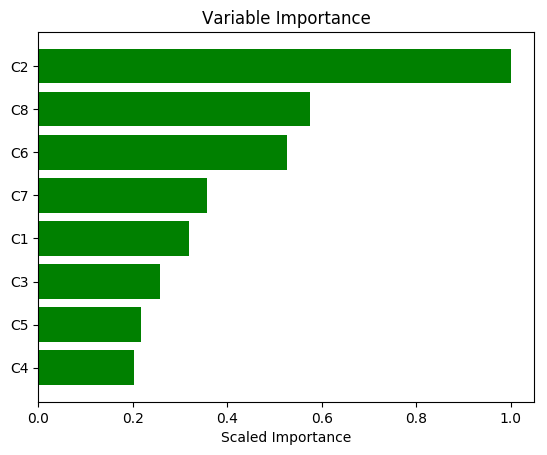

In [42]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### Segun random Forest las variables mas importantes serian plas, age y mass

### II Random Forest  para Diabetes usando scikit learn

In [43]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#La variable de respuesta y debe ser binaria (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True,random_state=0)
clf.fit(X, y)
print "la Precision estimada es", clf.score(X,y)

la Precision estimada es 0.986979166667


In [44]:
# Tasa de precision
predictions = clf.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       500
          1       1.00      0.97      0.98       268

avg / total       0.99      0.99      0.99       768



In [45]:
#Tasa de precision usando out-of-Bag
print clf.oob_score_

0.7421875


In [46]:
print(clf.feature_importances_)

[ 0.08178093  0.25522871  0.08433383  0.07064764  0.06914087  0.17326173
  0.12167218  0.14393411]


#### Nuevamente las variables mas importantes salieron plas mass y age

### III. Random Forest para Landsat usando H2o

In [47]:
#Leyendo los datos
datos= h2o.import_file("http://academic.uprm.edu/eacuna/landsat.txt")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36']
datos['C37']=datos['C37'].asfactor()
myy="C37"
model=H2ORandomForestEstimator(ntrees=50,max_depth=10,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print (y_pred['predict']==datos['C37']).sum()/float(len(datos))
model.model_performance(datos)

0.983089064262

ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.0262240813277
RMSE: 0.161938510947
LogLoss: 0.112816993708
Mean Per-Class Error: 0.0264157210162
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,Error,Rate
1072.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,072"
1.0,477.0,0.0,0.0,1.0,0.0,0.0041754,2 / 479
0.0,0.0,961.0,0.0,0.0,0.0,0.0,0 / 961
0.0,0.0,34.0,369.0,0.0,12.0,0.1108434,46 / 415
12.0,0.0,0.0,0.0,455.0,3.0,0.0319149,15 / 470
0.0,0.0,5.0,7.0,0.0,1026.0,0.0115607,"12 / 1,038"
1085.0,477.0,1000.0,376.0,456.0,1041.0,0.0169109,"75 / 4,435"


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9830891
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


In [48]:
print model.confusion_matrix

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1525799726795_7281


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.0840148386642
RMSE: 0.289853132921
LogLoss: 0.298038314339
Mean Per-Class Error: 0.128485448818
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,Error,Rate
1050.0,4.0,13.0,0.0,5.0,0.0,0.0205224,"22 / 1,072"
2.0,467.0,0.0,3.0,4.0,3.0,0.0250522,12 / 479
5.0,2.0,926.0,18.0,0.0,10.0,0.0364204,35 / 961
5.0,7.0,82.0,243.0,3.0,75.0,0.4144578,172 / 415
33.0,7.0,2.0,7.0,389.0,32.0,0.1723404,81 / 470
0.0,1.0,24.0,61.0,20.0,932.0,0.1021195,"106 / 1,038"
1095.0,488.0,1047.0,332.0,421.0,1052.0,0.0965051,"428 / 4,435"


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9034950
2,0.9812853
3,0.9966179
4,0.9979707
5,0.9986472
6,1.0



ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.0849740425839
RMSE: 0.291503074742
LogLoss: 0.278654018287
Mean Per-Class Error: 0.125812248391
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,Error,Rate
1052.0,3.0,15.0,0.0,2.0,0.0,0.0186567,"20 / 1,072"
0.0,467.0,1.0,3.0,4.0,4.0,0.0250522,12 / 479
5.0,3.0,926.0,17.0,1.0,9.0,0.0364204,35 / 961
5.0,4.0,82.0,246.0,2.0,76.0,0.4072289,169 / 415
33.0,7.0,0.0,6.0,390.0,34.0,0.1702128,80 / 470
0.0,2.0,21.0,61.0,17.0,937.0,0.0973025,"101 / 1,038"
1095.0,486.0,1045.0,333.0,416.0,1060.0,0.0940248,"417 / 4,435"


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9059752
2,0.9826381
3,0.9972943
4,0.9984217
5,0.9995491
6,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.9061977,0.0107298,0.8993289,0.8891129,0.912114,0.9293598,0.9219089,0.9178404,0.8945147,0.9205955,0.8837773,0.8934240
err,0.0938024,0.0107298,0.1006711,0.1108871,0.0878860,0.0706402,0.0780911,0.0821596,0.1054852,0.0794045,0.1162228,0.1065760
err_count,41.7,5.5321784,45.0,55.0,37.0,32.0,36.0,35.0,50.0,32.0,48.0,47.0
logloss,0.2791601,0.0274145,0.2865297,0.2759785,0.2564058,0.2441307,0.2541599,0.2480136,0.2815561,0.2604327,0.3829585,0.3014356
max_per_class_error,0.4063118,0.0546660,0.5348837,0.3888889,0.2857143,0.4146341,0.2857143,0.4523810,0.4411765,0.3684211,0.3913043,0.5
mean_per_class_accuracy,0.8741816,0.0097381,0.8603960,0.8642512,0.8860763,0.8905507,0.8938118,0.8874841,0.8621048,0.8789048,0.8617899,0.8564469
mean_per_class_error,0.1258184,0.0097381,0.1396041,0.1357488,0.1139237,0.1094493,0.1061882,0.1125159,0.1378952,0.1210953,0.1382100,0.1435531
mse,0.0849378,0.0054350,0.0917544,0.0898850,0.0801737,0.0734037,0.0778410,0.0773200,0.0873716,0.0804553,0.0967922,0.0943807
r2,0.9757999,0.0015542,0.9727613,0.9750702,0.9769992,0.9797448,0.9783667,0.9768083,0.9755763,0.9762230,0.9727531,0.9736961
rmse,0.2911426,0.0093208,0.3029099,0.2998082,0.2831496,0.2709312,0.2790001,0.2780648,0.2955868,0.2836465,0.3111144,0.3072144


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
,2018-05-08 14:10:40,11.810 sec,0.0,nan,nan,nan
,2018-05-08 14:10:40,11.824 sec,1.0,0.3799285,3.6310765,0.1727159
,2018-05-08 14:10:40,11.839 sec,2.0,0.3727982,3.2471740,0.1650926
,2018-05-08 14:10:40,11.858 sec,3.0,0.3665968,2.9493930,0.1587447
,2018-05-08 14:10:40,11.872 sec,4.0,0.3627989,2.7086966,0.1539695
---,---,---,---,---,---,---
,2018-05-08 14:10:40,12.518 sec,46.0,0.2896236,0.2974819,0.0967306
,2018-05-08 14:10:40,12.533 sec,47.0,0.2896475,0.2976441,0.0967306
,2018-05-08 14:10:40,12.547 sec,48.0,0.2898080,0.2981565,0.0962796
,2018-05-08 14:10:40,12.563 sec,49.0,0.2898506,0.2979999,0.0969560



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C17,8233.7119141,1.0,0.0635315
C18,7765.7626953,0.9431667,0.0599208
C22,7056.9448242,0.8570794,0.0544516
C20,6844.5566406,0.8312844,0.0528128
C5,6307.9780273,0.7661160,0.0486725
---,---,---,---
C15,1278.8540039,0.1553193,0.0098677
C27,1102.2558594,0.1338711,0.0085050
C11,889.9918823,0.1080912,0.0068672
C7,889.2172852,0.1079971,0.0068612



See the whole table with table.as_data_frame()
<bound method ?.confusion_matrix of >


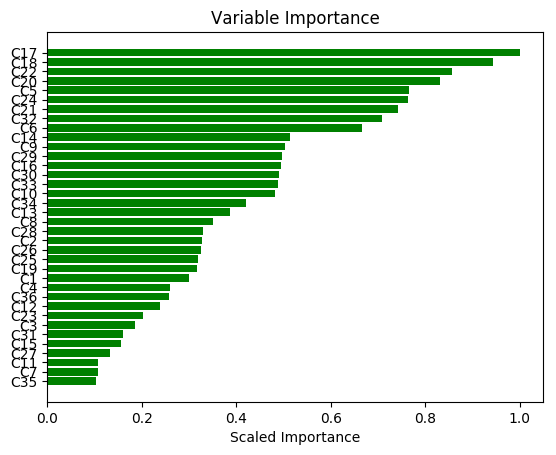

In [49]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### Las 6 variables mas importantes c18, c17, c22, c21, c24 y c20

### IV. Random Forest usando Scikit-Learn

In [50]:
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]-1
names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36','C37']
X=data.iloc[:,0:36]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True, random_state=0)
clf.fit(X, y)
print "la Precision estimada es", clf.score(X,y)

la Precision estimada es 0.972717023675


In [51]:
predictions = clf.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99      1072
          1       1.00      1.00      1.00       479
          2       0.95      1.00      0.97       961
          3       0.98      0.80      0.88       415
          4       1.00      0.93      0.97       470
          5       0.96      0.99      0.98      1038

avg / total       0.97      0.97      0.97      4435



In [52]:
#Estimacion del error usando out-of-bag
print clf.oob_score_

0.898534385569


In [53]:
print(clf.feature_importances_)

[ 0.0151426   0.02236955  0.00933652  0.01346124  0.03756244  0.02431621
  0.00885772  0.01182643  0.02164484  0.01734902  0.00778902  0.02265685
  0.03495008  0.04105357  0.02258549  0.03426316  0.08886045  0.05336134
  0.02783217  0.04746638  0.04815995  0.04380354  0.01428742  0.02988966
  0.04441645  0.02346674  0.00710566  0.02775813  0.02947498  0.02382096
  0.00788551  0.03829542  0.03270221  0.03890708  0.00804944  0.01929177]


#### Las variables mas importante son 17, 18, 21, 20, 25 y 22

### V. Aplicando Random Forest   a un dataset con missing values 

In [54]:
#Leyendo los datos
datos= h2o.import_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",na_strings=[' ?'])
myx=['C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9','C10','C11', 'C12','C13','C14']
datos['C15']=datos['C15'].asfactor()
myy="C15"
model=H2ORandomForestEstimator(ntrees=100,max_depth=20,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print (y_pred['predict']==datos['C15']).sum()/float(len(datos))
model.model_performance(datos)

0.943214274746

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0490778289894
RMSE: 0.221535164228
LogLoss: 0.170878231052
Mean Per-Class Error: 0.0592435997365
AUC: 0.98590946312
Gini: 0.97181892624
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.399508679464: 


,<=50K,>50K,Error,Rate
<=50K,23554.0,1166.0,0.0472,(1166.0/24720.0)
>50K,687.0,7154.0,0.0876,(687.0/7841.0)
Total,24241.0,8320.0,0.0569,(1853.0/32561.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3995087,0.8853413,202.0
max f2,0.2883408,0.9229527,241.0
max f0point5,0.5704723,0.8968495,148.0
max accuracy,0.4144839,0.9433371,197.0
max precision,0.9998225,1.0,0.0
max recall,0.0792624,1.0,335.0
max specificity,0.9998225,1.0,0.0
max absolute_mcc,0.4022657,0.8481995,201.0
max min_per_class_accuracy,0.3647299,0.9381456,214.0
max mean_per_class_accuracy,0.3281231,0.9407564,226.0


Gains/Lift Table: Avg response rate: 24.08 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100120,0.9984491,4.1526591,4.1526591,1.0,1.0,0.0415763,0.0415763,315.2659100,315.2659100
,2,0.0200240,0.9928625,4.1526591,4.1526591,1.0,1.0,0.0415763,0.0831527,315.2659100,315.2659100
,3,0.0300052,0.9852956,4.1526591,4.1526591,1.0,1.0,0.0414488,0.1246015,315.2659100,315.2659100
,4,0.0400172,0.9724238,4.1526591,4.1526591,1.0,1.0,0.0415763,0.1661778,315.2659100,315.2659100
,5,0.0500292,0.9511034,4.1526591,4.1526591,1.0,1.0,0.0415763,0.2077541,315.2659100,315.2659100
,6,0.1000276,0.8103805,4.1297021,4.1411841,0.9944717,0.9972367,0.2064788,0.4142329,312.9702139,314.1184144
,7,0.1500261,0.6885977,3.8389140,4.0404480,0.9244472,0.9729785,0.1919398,0.6061727,283.8913971,304.0448045
,8,0.2000246,0.5554053,3.3568178,3.8695667,0.8083538,0.9318287,0.1678357,0.7740084,235.6817798,286.9566724
,9,0.3000215,0.3063940,1.9360370,3.2251228,0.4662162,0.7766404,0.1935978,0.9676062,93.6037013,222.5122795
,10,0.4000184,0.1509837,0.3137451,2.4973343,0.0755528,0.6013820,0.0313735,0.9989797,-68.6254871,149.7334259


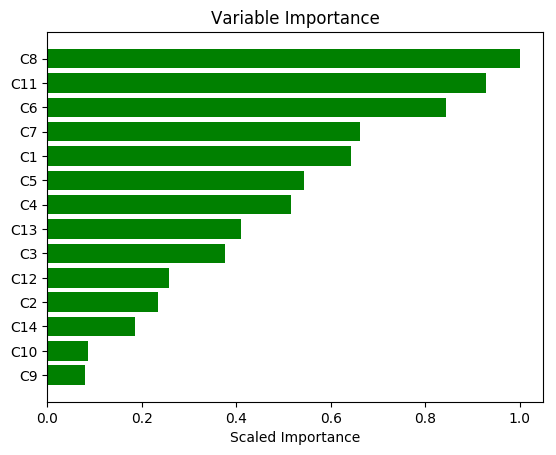

In [55]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()